# Remote vs Onsite: A Comparative Analysis of Data Analyst Roles

In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [ ]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title'] == 'Data Analyst')].copy()

In [9]:
df_DA_US['job_schedule_type'].unique()


array(['Full-time', 'Contractor', 'Full-time and Contractor',
       'Full-time and Part-time', 'Contractor and Temp work',
       'Internship', 'Full-time and Temp work', 'Part-time', None,
       'Temp work', 'Part-time and Contractor',
       'Full-time, Contractor, and Temp work', 'Part-time and Temp work',
       'Full-time and Per diem', 'Full-time, Part-time, and Contractor',
       'Part-time and Per diem', 'Per diem', 'Full-time and Internship'],
      dtype=object)

In [11]:
df_DA_US.loc[:, 'work_setting'] = np.where(df_DA_US['job_work_from_home'] == True, 'Remote', 
                                            np.where(df_DA_US['job_schedule_type'].str.contains('Full-time', case=False, na=False) & 
                                                     df_DA_US['job_schedule_type'].str.contains('Part-time', case=False, na=False), 'Hybrid', 'Onsite'))


C:\Users\marpi\AppData\Local\Temp\ipykernel_22628\4047652172.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_DA_US, x='work_setting', y='salary_year_avg', width=0.5, ci=None)
c:\Users\marpi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marpi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\marpi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a f

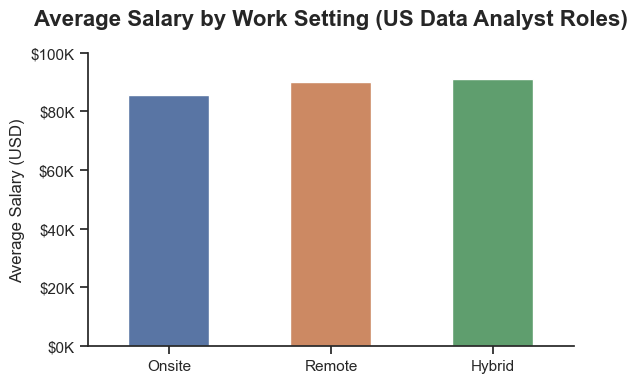

In [ ]:
sns.set_theme(style='ticks')

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df_DA_US, x='work_setting', y='salary_year_avg', width=0.5, ci=None)
sns.despine()

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x/1000:,.0f}K'))

# Add space between title and plot
plt.title('Average Salary by Work Setting (US Data Analyst Roles)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('Average Salary (USD)')

ax.spines['top'].set_visible(False)

plt.ylim(0, 100000)

plt.tight_layout()
plt.show()